<a href="https://colab.research.google.com/github/q4quang/AIO-2024/blob/feature/Heart_Disease_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Bài tập 1**

In [2]:
df = pd.read_csv('./data/cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


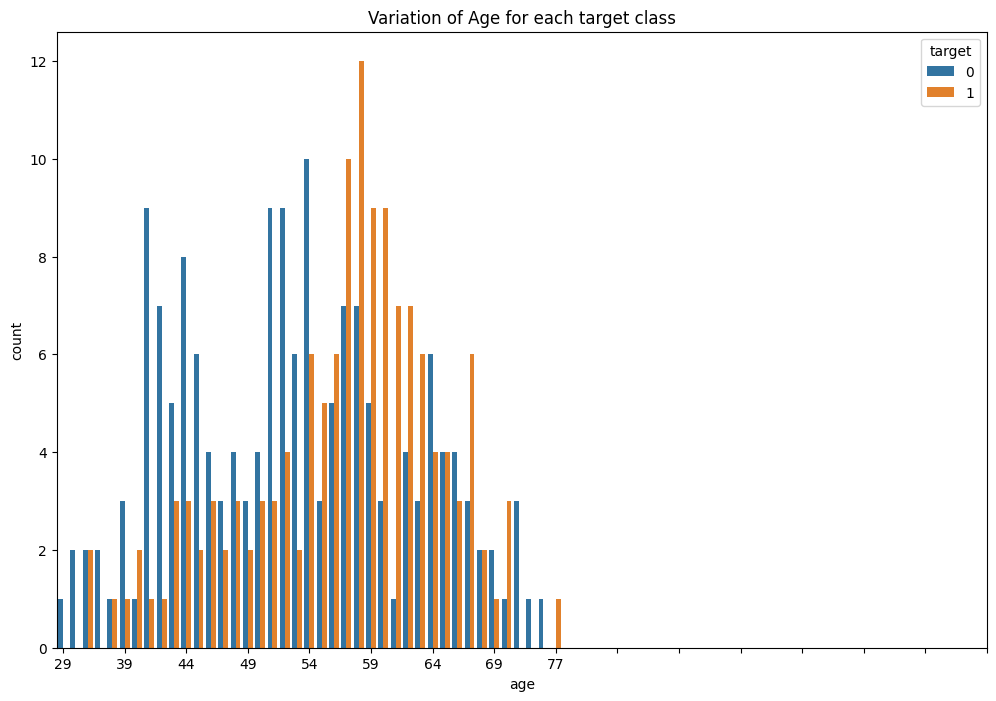

In [3]:
plt.figure(figsize=(12, 8))
sns.countplot(df, x='age', hue='target')
plt.title('Variation of age for each target class')
plt.xticks(np.arange(0, 80, 5))
plt.show()

**Bài tập 2**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


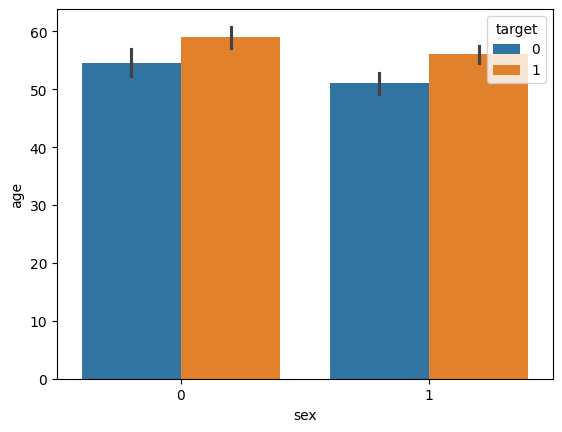

In [4]:
sns.barplot(df, x='sex', y='age', hue='target')
plt.show()

**Bài tập 3:** sử dụng KNN cho dự đoán bệnh tim

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5,
                                 weights='uniform',
                                 algorithm='auto',
                                 leaf_size=30,
                                 p=2,
                                 metric='minkowski')
knn_model.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, knn_model.predict(X_train))
cm_test = confusion_matrix(y_test, knn_model.predict(X_test))
print()
accuracy_for_train_knn = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test_knn = np.round(
    (cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(
    accuracy_for_train_knn))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(
    accuracy_for_test_knn))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


**Bài tập 4:** SVM

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

svm_model = svm.SVC(kernel='rbf',
                    random_state=42)
svm_model.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, svm_model.predict(X_train))
cm_test = confusion_matrix(y_test, svm_model.predict(X_test))
print()
accuracy_for_train_svc = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test_svc = np.round(
    (cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train_svc))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test_svc))


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


**Bài tập 5:** Naive bayes

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

gaussianNB_model = GaussianNB()
gaussianNB_model.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, gaussianNB_model.predict(X_train))
cm_test = confusion_matrix(y_test, gaussianNB_model.predict(X_test))
print()
accuracy_for_train_nb = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test_nb = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for NaiveBayes = {}'.format(accuracy_for_train_nb))
print('Accuracy for test set for NaiveBayes = {}'.format(accuracy_for_test_nb))


Accuracy for training set for NaiveBayes = 0.85
Accuracy for test set for NaiveBayes = 0.84


**Bài tập 6:** Decision Tree

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

dt_classifier_model = DecisionTreeClassifier(criterion='gini',
                                             max_depth=10,
                                             min_samples_split=2)
dt_classifier_model.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, dt_classifier_model.predict(X_train))
cm_test = confusion_matrix(y_test, dt_classifier_model.predict(X_test))
print()
accuracy_for_train_dt = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test_dt = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for DecisionTree = {}'.format(accuracy_for_train_dt))
print('Accuracy for test set for DecisionTree = {}'.format(accuracy_for_test_dt))


Accuracy for training set for DecisionTree = 1.0
Accuracy for test set for DecisionTree = 0.74


**Bài tập 7:** Random Forest

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

rf_classifier_model = RandomForestClassifier(criterion='gini',
                                             max_depth=10,
                                             min_samples_split=2,
                                             n_estimators=10,
                                             random_state=42)
rf_classifier_model.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, rf_classifier_model.predict(X_train))
cm_test = confusion_matrix(y_test, rf_classifier_model.predict(X_test))
print()
accuracy_for_train_rf = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test_rf = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for RandomForest = {}'.format(accuracy_for_train_rf))
print('Accuracy for test set for RandomForest = {}'.format(accuracy_for_test_rf))


Accuracy for training set for RandomForest = 0.98
Accuracy for test set for RandomForest = 0.8


**Bài tập 8:** AdaBoost

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

adaBoost_classifier_model = AdaBoostClassifier(n_estimators=50,
                                               learning_rate=1.0)
adaBoost_classifier_model.fit(X_train, y_train)
cm_train = confusion_matrix(
    y_train, adaBoost_classifier_model.predict(X_train))
cm_test = confusion_matrix(y_test, adaBoost_classifier_model.predict(X_test))
print()
accuracy_for_train_ada = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test_ada = np.round(
    (cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for AdaBoost = {}'.format(accuracy_for_train_ada))
print('Accuracy for test set for AdaBoost = {}'.format(accuracy_for_test_ada))


Accuracy for training set for AdaBoost = 0.91
Accuracy for test set for AdaBoost = 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**Bài tập 9:** GradientBoost

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

gradientBoost_classifier_model = GradientBoostingClassifier(n_estimators=100,
                                                            learning_rate=0.1,
                                                            subsample=1.0,
                                                            min_samples_split=2,
                                                            max_depth=3,
                                                            random_state=42)
gradientBoost_classifier_model.fit(X_train, y_train)
cm_train = confusion_matrix(
    y_train, gradientBoost_classifier_model.predict(X_train))
cm_test = confusion_matrix(
    y_test, gradientBoost_classifier_model.predict(X_test))
print()
accuracy_for_train_gb = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test_gb = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for GradientBoost = {}'.format(accuracy_for_train_gb))
print('Accuracy for test set for GradientBoost = {}'.format(accuracy_for_test_gb))


Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


**Bài tập 10:** XGBoost

In [12]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

xgb_classifier_model = XGBClassifier(objective='binary:logistic',
                                     n_estimators=100,
                                     random_state=42)
xgb_classifier_model.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, xgb_classifier_model.predict(X_train))
cm_test = confusion_matrix(y_test, xgb_classifier_model.predict(X_test))
print()
accuracy_for_train_xg = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test_xg = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for XGBoost = {}'.format(accuracy_for_train_xg))
print('Accuracy for test set for XGBoost = {}'.format(accuracy_for_test_xg))


Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.87


**Bài tập 11:** Stacking

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)
svc = svm.SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

estimators = [('dtc', dtc),
              ('rfc', rfc),
              ('knn', knn),
              ('xgb', xgb),
              ('svc', svc),
              ('ad', ad)]

clf = StackingClassifier(estimators=estimators,
                         final_estimator=xgb)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train_st = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test_st = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train_st))
print('Accuracy for test set for Stacking = {}'.format(accuracy_for_test_st))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1


Accuracy for training set for Stacking = 0.98
Accuracy for test set for Stacking = 0.85
